In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("housing.csv")

# Cleaning data

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

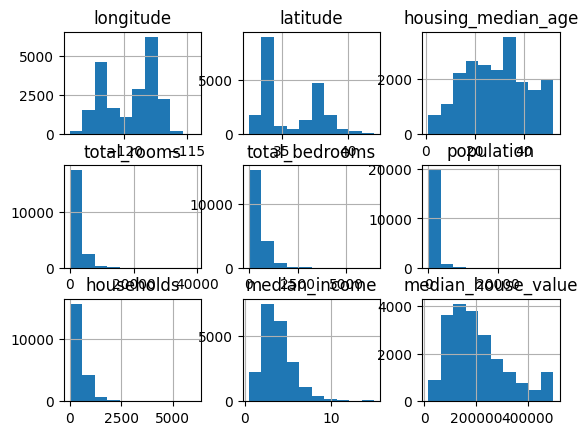

In [4]:
df.hist()

#### fitting data to normal distribution

In [5]:
df['total_rooms'] = np.log(df['total_rooms']+1)
df['total_bedrooms'] = np.log(df['total_bedrooms']+1)
df['population'] = np.log(df['population']+1)
df['households'] = np.log(df['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

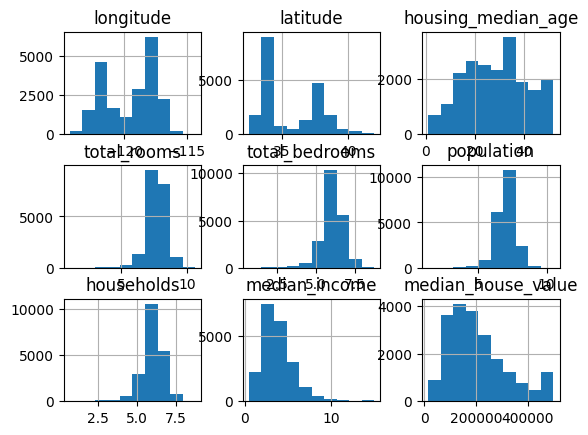

In [6]:
df.hist()

### Removing NAN values

In [7]:
data = df.dropna()

#### Finding ocean_proximity names

In [8]:
data.ocean_proximity.value_counts()


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

#### One_hot_encoding

In [9]:
ocean_prox= pd.get_dummies(data.ocean_proximity)
data = data.join(ocean_prox).drop(['ocean_proximity'],axis = 1)


# Feature engineering

<Axes: >

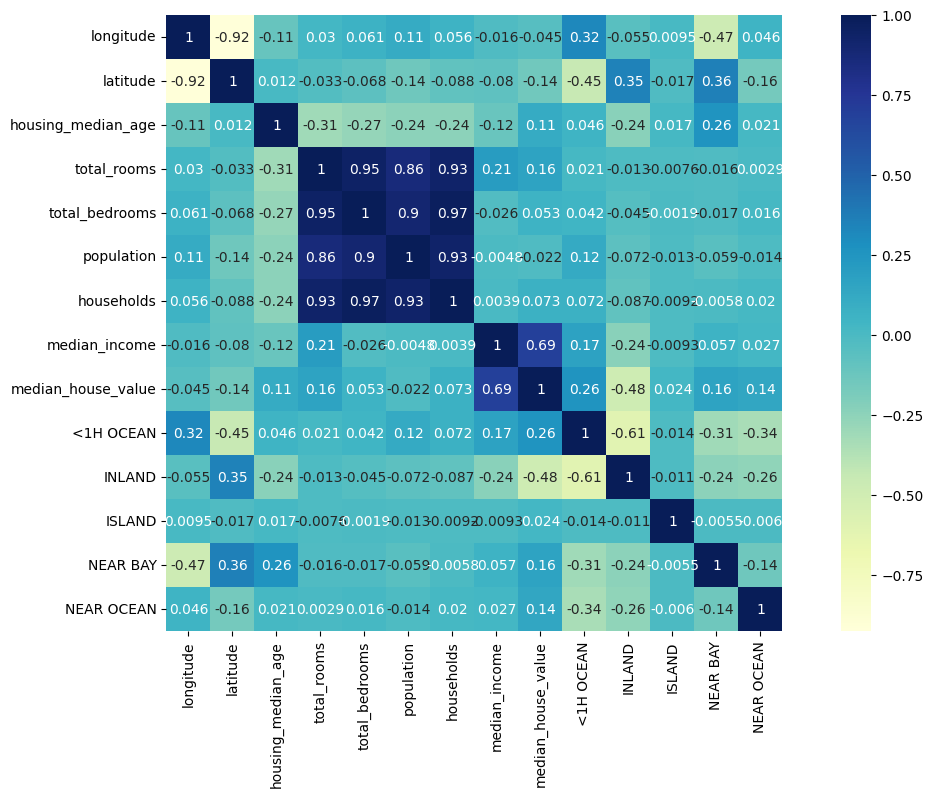

In [10]:
cor= data.corr()
plt.figure(figsize=(15,8)) #controlling the fig size in matlab controls sns
sns.heatmap(cor,square=True,annot= True, cmap= 'YlGnBu')

In [11]:
def adding_features(data):
    data['rooms/household'] = data['total_rooms'] / data['households']
    data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
adding_features(data)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms/household,bedroom_ratio
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False,1.399834,0.717813
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False,1.260013,0.790429
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False,1.407171,0.720313
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False,1.325768,0.764097
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False,1.329892,0.762444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False,1.278530,0.798973
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False,1.380045,0.766205
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False,1.271340,0.801228
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False,1.285243,0.799078


<Axes: >

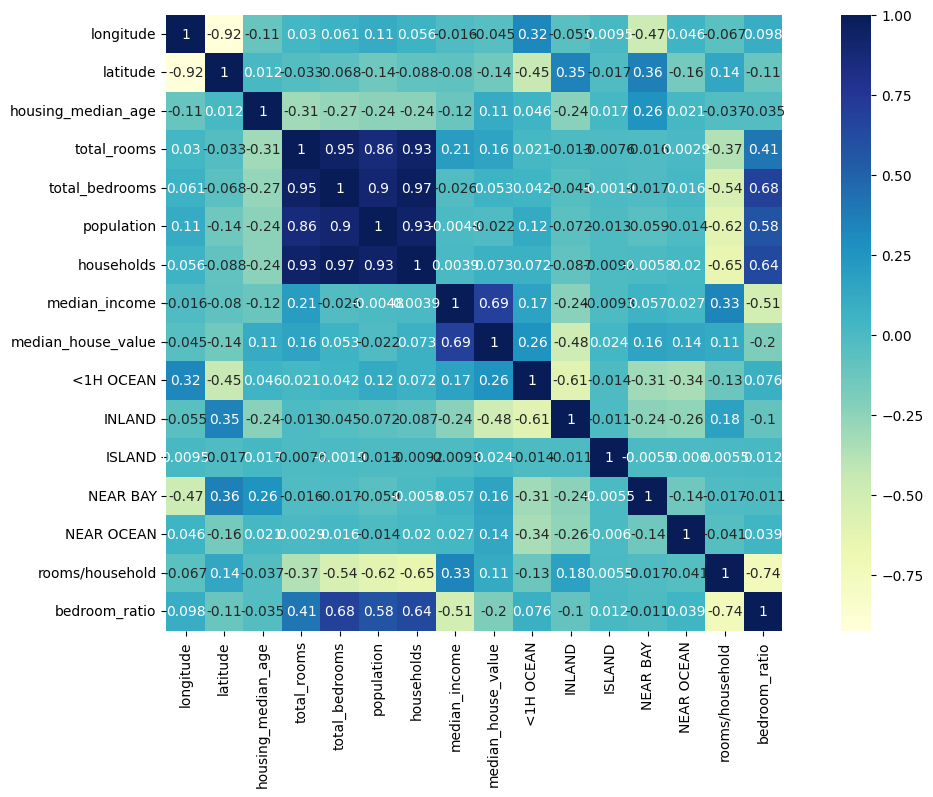

In [12]:
cor= data.corr()
plt.figure(figsize=(15,8)) #controlling the fig size in matlab controls sns
sns.heatmap(cor,square=True,annot= True, cmap= 'YlGnBu')

# Machine learning

In [13]:
x = data.drop(['median_house_value'],axis = 1)
y= data['median_house_value']


In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x , y , test_size=0.2) #order is important

train_data = x_train.join(y_train)


In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [16]:
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.6802642103521022

## Scaling data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [20]:
forest.fit( x_train ,y_train)
forest.score(x_test,y_test)

0.8276886705328094

## Saving best model

In [21]:
import joblib
joblib.dump(forest,'Forest_model.joblib')


['Forest_model.joblib']